In [4]:
#Importing all libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

# Problem_Statemnent--->
#A retail company “ABC Private Limited” wants to understand 
the customer purchase behaviour (specifically, purchase amount) 
against various products of different categories. They have shared 
purchase summary of various customers for selected high volume products 
from last month. The data set also contains customer demographics 
(age, gender, marital status, city_type, stay_in_current_city), product
details (product_id and product category) and Total purchase_amount from last month.

#Now, they want to build a model to predict the purchase amount of customer 
against various products which will help them to create personalized offer
for customers against different products.

In [263]:
#Importing train data-->
train=pd.read_csv("train.csv")

In [264]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [265]:
#Importing test data-->
test=pd.read_csv("test.csv")

In [266]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [267]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [268]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [269]:
#Merge the both data for test-->
#We can use append syntax here intead of merge syntax like-
final_data=train.append(test)
#final_data=pd.merge(train,test,how="left")

C:\Users\RAFIKUL\AppData\Local\Temp\ipykernel_15844\1557394488.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=train.append(test)


In [270]:
final_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [271]:
#Now their is no use of user_id column because it's an unique id 
#So i'm droping that column 
#Here i used axis option it can be 0 or 1, 0 means we want to remoe 
#the data row wwisw and 1 means delete the whole column.
#And one more thing inplace is here that will help us to
#update the final_data from evrywhere
final_data.drop(columns=["User_ID"],axis=1,inplace=True)


In [272]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [273]:
#now gender age all are in chatagories feautr we have to conver it into 
#a numerical value cuz my machine can't understand that
#In below code i got m/f as a 0/1 or 1/0 but in this way 
#if i try to change the data then it will be more difficult
pd.get_dummies(final_data["Gender"])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [274]:
#To make it easy now i'm gonna use map function
#here i mentioned that from final_data gender 
#column where have f change it to 0 and male covert to 1
final_data["Gender"]=final_data["Gender"].map({"F":0,"M":1})

In [275]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [276]:
#Now handel the age chatagorical features
#Converting age into a numberical value by same method like previous one(Gender)
final_data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [277]:
#Here i'm not chnaging value from 1 instead of 0 because in 
#their will be calculation in model learning if i used 0 then
#it will be create a create a problem
final_data["Age"]=final_data["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [278]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [279]:
#Now let's the the City_catefory to a numerical value for machine learning
#Here im gonna use dummies
city_value=pd.get_dummies(final_data["City_Category"],drop_first=1)
city_value.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [280]:
#Now concating the dummies value into data set-->
final_data=pd.concat([final_data,city_value],axis=1)

In [281]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [165]:
#Now i dont need City_catagory any more cuz i already concat the b and c
#si now let's drop the city column
#final_data.drop(columns={"City_Category"},axis=1,inplace=True)

In [282]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [283]:
#Now all done with categorical feature to numeri
#Now time to fixeed the missing values
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
#There is lot of missing value in product_catagory_1 and 2 
#we don't have to orry about purcase

In [284]:
#These are the unique value from Product_Category_2
final_data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [285]:
#These are the number of value from Product_Category_2
final_data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [286]:
#now from above calculation we can see that 8 is the maximum product 2 count
#and in the below code when we calculate mkde we got 8 as a result.
final_data["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [287]:
#weare getting two values from mode actually its a series from 0-8
#now to get the 8 value we have to mentioned it in bracket
final_data["Product_Category_2"].mode()[0]

8.0

In [288]:
#Now i have to replace these mode value-8 to null place of Product_Category_2
#Here i used fillna option to replace the missing value with 8
final_data["Product_Category_2"]=final_data["Product_Category_2"].fillna(final_data["Product_Category_2"].mode()[0])

In [289]:
#Now see all Product_Category_2 missing value is replaceed!
final_data["Product_Category_2"].isnull().sum()

0

In [290]:
#Now for Product_Category_3 i relace missing values
#in the same way
#First i checked the unique value list
final_data["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [291]:
#Then here we have all value counts in Product_Category_3
final_data["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [292]:
#From the above observation we can see that 16 is the most common 
#Now if we check mode value that is also 16
final_data["Product_Category_3"].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [293]:
#So i will replace the Product_Category_3 all missing value with 16
final_data["Product_Category_3"]=final_data["Product_Category_3"].fillna(final_data["Product_Category_3"].mode()[0])

In [294]:
final_data["Product_Category_3"].isnull().sum()

0

In [ ]:
#Now all Product_Category_3 missing value replaced

In [295]:
#Now there is one more variable Stay_In_Current_City_Years
#lets see what inside in the variable
final_data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [298]:
#from above observation we see a "+" sign so
#i will first replace "+" sign with blank
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].str.replace("+"," ")

C:\Users\RAFIKUL\AppData\Local\Temp\ipykernel_15844\444957282.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].str.replace("+"," ")


In [300]:
final_data["Stay_In_Current_City_Years"].unique()

array(['2', '4 ', '3', '1', '0'], dtype=object)

In [ ]:
#Now in above operation "+" sign is replaced with blank space

In [301]:
#Now let's check all the variable type
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [302]:
#Here Stay_In_Current_City_Years is assigned as a object but
#in data its a integer value so i have to covert that object to
#integer, by using astype function
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].astype(int)

In [303]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [ ]:
#Now check above observation it's already coberted to int32
#in order to do it in int64 we have to just metioned it in bracket 
#int64 instead of int32

In [304]:
#Now let's change the data type for B and C variable also to int
final_data["B"]=final_data["B"].astype(int)

In [306]:
final_data["C"]=final_data["C"].astype(int)

In [307]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

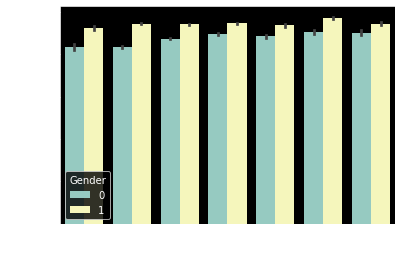

In [309]:
#Now visualization process-->
sns.barplot("Age","Purchase",hue="Gender",data=final_data)

In [ ]:
#Observation --> Frome above graph i can say that men did shoping more than female
#and also we can say that in whcih age group of people purchase more things
#for that i have to check previously assignes value for age in codde

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

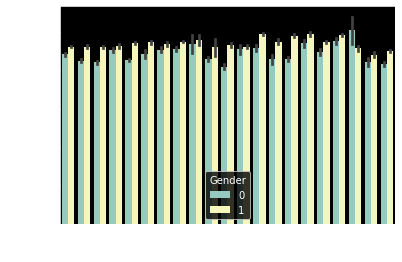

In [310]:
sns.barplot("Occupation","Purchase",hue="Gender",data=final_data)

In [ ]:
#Observation--> From above graph i can say that the person occupation 18
#purchased most(18 occupation i have to check from data)

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

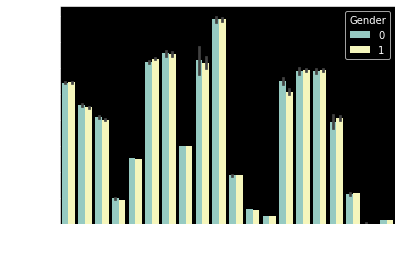

In [311]:
sns.barplot("Product_Category_1","Purchase",hue="Gender",data=final_data)


In [ ]:
#Observation--> From this graph i can say that most sold product is catagory-10
#from Product_Category_1

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

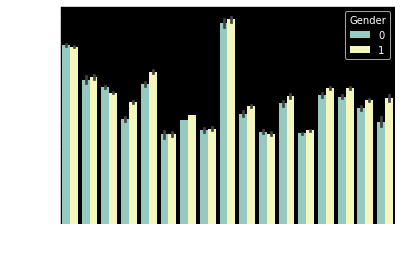

In [312]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=final_data)

In [ ]:
#Observation--> From this graph i can say that most sold product is catagory-10
#from Product_Category_2

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

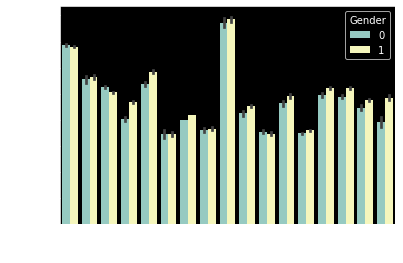

In [313]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=final_data)

In [ ]:
#Observation--> From this graph i can say that most sold product is catagory-10
#from Product_Category_3

In [ ]:
# Process :
#        -First both data import(train,test)
#        -then append both data in a single data(final_data)
#        -then change the categorical features to numerical for modeling(Age,Gender,City_Catagorey)
#        -in Age and Gender used replaece options like if f then 0 if m then 1 but in cit_catagory 
#         used get demmis so after get the value concated it.
#        -then checked for missing value 
#        -found large number of missing value in Product_Category_2,3
#        -for replace those missing value calculate the mode and repleace all those value by fillna option
#        -then i changed the data type for some variables(B,C,Stay_In_Current_City_Years) into int
#        -then i visualized the data for some info.